## Lesson 03: Machine Leanring Model, the first step

生成随机数据

In [1]:
import numpy as np

In [2]:
# 使用 random.random 随机生成数据
# 接收一个元组，表示数据的 shape
random_data = np.random.random((20, 2))

In [3]:
random_data.shape

(20, 2)

In [4]:
random_data

array([[0.36358092, 0.51531534],
       [0.41312528, 0.11521889],
       [0.28761139, 0.74930607],
       [0.02312702, 0.819156  ],
       [0.634159  , 0.48173679],
       [0.44266921, 0.07402367],
       [0.63089146, 0.47782961],
       [0.12951698, 0.48476169],
       [0.17703312, 0.82850512],
       [0.68946346, 0.54800909],
       [0.33390367, 0.74650933],
       [0.43915411, 0.31382084],
       [0.94381673, 0.26804571],
       [0.72881658, 0.74712144],
       [0.08146171, 0.61212933],
       [0.85222891, 0.43770674],
       [0.90178253, 0.33897993],
       [0.63359356, 0.0047809 ],
       [0.89182442, 0.83980449],
       [0.10458608, 0.7400992 ]])

把数据划分为X和标签y

In [5]:
# 取所有行，第0列
X = random_data[:, 0]

In [6]:
# 取所有行，第1列
y = random_data[:, 1]

假设函数

In [7]:
import random

In [8]:
def assuming_function(x):
    # 假设数据和标签之间有如下关系
    # 潜在函数关系 w * x + b
    # 随机变化 random.randint(-5, 5)
    return 13.4 * x + 5 + random.randint(-5, 5)

In [9]:
y = [assuming_function(x) for x in X]

In [10]:
y

[5.871984372544478,
 11.53587870692661,
 7.8539926452407265,
 7.309902057507534,
 10.497730546276966,
 15.931767370865142,
 8.453945610137117,
 5.735527583416227,
 7.37224378254697,
 16.23881040639562,
 14.474309131859119,
 11.884665131577197,
 21.64714422170048,
 9.766142165288265,
 8.091586864390628,
 20.419867372830346,
 17.083885950153537,
 13.49015376344174,
 11.950447161623039,
 5.401453409731667]

绘制数据

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

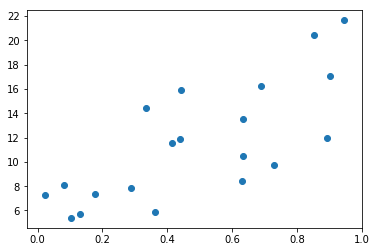

In [12]:
plt.scatter(X, y)

In [13]:
# y的格式转换成ndarray
y = np.array(y)

## Regression -> Real Number
## Classification -> [0,0,0,1],[0,1,0,0]

使用sklearn实现线性回归

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
X.shape

(20,)

In [17]:
# 拟合数据
# X 是一维数据, shape为(20,)，reshape之后变成二维(20, 1)
reg.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# 获取打分（R2）
reg.score(X.reshape(-1, 1), y)

0.5577133638868044

In [19]:
# w
reg.coef_

array([12.14110241])

In [20]:
# b
reg.intercept_

5.660713009286018

In [21]:
# 预测函数，使用训练出的w和b进行预测
def f(x):
    return reg.coef_ * x + reg.intercept_

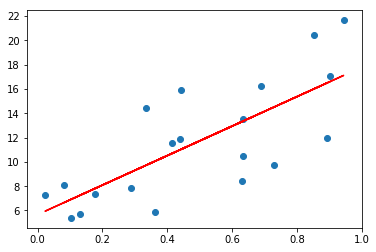

In [22]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [23]:
X

array([0.36358092, 0.41312528, 0.28761139, 0.02312702, 0.634159  ,
       0.44266921, 0.63089146, 0.12951698, 0.17703312, 0.68946346,
       0.33390367, 0.43915411, 0.94381673, 0.72881658, 0.08146171,
       0.85222891, 0.90178253, 0.63359356, 0.89182442, 0.10458608])

In [24]:
# 使用自带函数进行预测
reg.predict([[0.5]])

array([11.73126421])

实现KNN

In [25]:
# 模型训练
def model(X, y):
    # 直接将数据存储即可
    return [(X_i, y_i) for X_i, y_i in zip(X, y)]

In [26]:
from scipy.spatial.distance import cosine

In [31]:
def distance(x1, x2):
# 余弦相似度
#     return cosine(x1, x2)
# 曼哈顿距离
    return abs(x1 - x2)


In [32]:
# 预测 - 回归
def predict(x, k=5):
    # 需要大量计算
    most_similars = sorted(model(X, y), key=lambda x_i: distance(x_i[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)

In [29]:
X, y

(array([0.36358092, 0.41312528, 0.28761139, 0.02312702, 0.634159  ,
        0.44266921, 0.63089146, 0.12951698, 0.17703312, 0.68946346,
        0.33390367, 0.43915411, 0.94381673, 0.72881658, 0.08146171,
        0.85222891, 0.90178253, 0.63359356, 0.89182442, 0.10458608]),
 array([ 5.87198437, 11.53587871,  7.85399265,  7.30990206, 10.49773055,
        15.93176737,  8.45394561,  5.73552758,  7.37224378, 16.23881041,
        14.47430913, 11.88466513, 21.64714422,  9.76614217,  8.09158686,
        20.41986737, 17.08388595, 13.49015376, 11.95044716,  5.40145341]))

In [33]:
predict(0.5)

[(0.44266920678098065, 15.931767370865142), (0.43915411429680573, 11.884665131577197), (0.41312527663631415, 11.53587870692661), (0.6308914634430683, 8.453945610137117), (0.6335935644359507, 13.49015376344174)]


12.259282116589562

In [34]:
# 创建类别标签，随机生成0，1,2
y = [random.randint(0,2) for x in X]

In [35]:
y

[0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0]

In [36]:
from collections import Counter

In [37]:
# 预测 - 分类
def predict_c(x, k=5):
    # 需要大量计算
    most_similars = sorted(model(X, y), key=lambda x_i: distance(x_i[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    # 统计出现次数
    cnt = Counter(y_hats)
    # 返回出现最多的项目
    return cnt.most_common()[0][0]

In [66]:
predict_c(0.5)

[(0.15046750000135944, 0), (0.7045413955374116, 2), (0.7476306504386577, 0), (0.40526736246484096, 0), (0.35403084104223814, 0)]


0

## How to implement a Decision Tree

### 1.Entropy
$$Entropy = - \sum_{i=1}^nPr(x_i)log(Pr(x_i))$$

### 2. Gini Index
$$ Gini = \sum_{i=1}^nPr(x_i)(1-Pr(x_i))\\=1 - \sum_{i=1}^nPr(x_i)^2$$

[1, 2, 3, 4, 4, 5, 5, 5, 6]  
[1, 1, 1, 1, 1, 2, 2, 2, 2]  
[2, 2, 2, 2, 2, 2, 2, 2, 3]  
[4, 4, 4, 4, 4, 4, 4, 4, 4]  

In [68]:
!pip install icecream

  Stored in directory: C:\Users\杨羊\AppData\Local\pip\Cache\wheels\b0\71\dc\c1bdcd4b384c4458b639dfa905bc093979b8779f2e0df78792
Successfully built executing


In [69]:
# 调试输出库
from icecream import ic

In [83]:
def entropy(elements):
    '''计算群体的混乱程度'''
    counter = Counter(elements)
#     probs = [counter[c] / len(elements) for c in set(elements)]
    probs = [counter[c] / len(elements) for c in counter]
    ic(probs)
    return -sum(p * np.log(p) for p in probs)

In [84]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [85]:
entropy([1, 1, 1, 0])

ic| probs: [0.75, 0.25]


0.5623351446188083

In [86]:
entropy([2, 3, 3, 3])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [87]:
entropy([2, 3, 3, 4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [88]:
entropy([1, 2, 2, 3])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [89]:
entropy([1, 2, 3, 4])

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

## 决策树怎么来决定，哪一个特征来进行分割呢？

In [90]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [91]:
import pandas as pd

In [92]:
dataset = pd.DataFrame.from_dict(mock_data)

In [93]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


如果我们来了一个新的case  
::: [F, -10, 2, 1] -> ?  
::: [F, +10, 2, 0] -> ?

In [94]:
# split_by_gender:
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_pet
print(entropy([1, 1, 1, 1]) + entropy([0, 0, 0]))

ic| probs: [0.75, 0.25]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.4, 0.6]
ic| probs: [1.0]
ic| probs: [0.4, 0.6]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565
-0.0


## 决策树在选择决策过程，决策顺序的时候，其实是按照，根据这个特征，进行分割之后，数据的熵最少原则进行的。

In [95]:
set(mock_data['family_number'])

{1, 2}

In [96]:
set(mock_data['gender'])

{'F', 'M'}

In [97]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [98]:
sub_split_1

[1, 1, 0, 0, 0]

In [99]:
splited_data = dataset[dataset['family_number'] == 1]

In [100]:
splited_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [101]:
splited_data[splited_data['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [102]:
splited_data[splited_data['income'] == '-10']

,gender,income,family_number,bought
1,F,-10,1,1


## ==> 根据信息熵，我们得到了一个决策过程：

```
第一步： 我们观察他的家庭成员：
        如果他的家庭成员是2人，那么就会购买，如果不是2人，我们继续决策，进入下一步
第二步： 我们观察他的收入情况：
        如果他的收入是'+10'， 那么他有 3/4 的概率会购买，如果是 '-10', 那么，他肯定不买
```

In [103]:
# split by gender
entropy([1, 1, 0]) + entropy([0, 0])

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [1.0]


0.6365141682948128

In [104]:
# split by income
entropy([1, 0, 0, 0]) + entropy([1])

ic| probs: [0.25, 0.75]
ic| probs: [1.0]


0.5623351446188083

In [105]:
sub_split_1

[1, 1, 0, 0, 0]

In [106]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [107]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.4, 0.6]
ic| probs: [1.0]


0.6730116670092565

In [109]:
sub_split_1

[1, 1, 0, 0, 0]

In [110]:
sub_split_2

[1, 1]

In [111]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [112]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

In [113]:
_sub_split_1

[0, 0, 1]

In [114]:
_sub_split_2

[1, 1, 1, 0]

In [115]:
entropy(_sub_split_1) + entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.75, 0.25]


1.198849312913621

In [116]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.4, 0.6]
ic| probs: [1.0]


0.6730116670092565

In [117]:
set(dataset.columns.tolist()) - {'bought'}

{'family_number', 'gender', 'income'}

In [118]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [119]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.4, 0.6]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.4, 0.6]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| pro

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [120]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [121]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [122]:
find_the_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.4, 0.6]
ic| entropy_1: 0.6730116

spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [123]:
fm_n_1 = dataset[dataset['family_number'] == 1]

In [124]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [125]:
# split_gender 
print(entropy([1, 0]) + entropy([0, 0]))

# split_family_number
print(entropy([1, 0, 0, 0]))

ic| probs: [0.5, 0.5]
ic| probs: [1.0]
ic| probs: [0.25, 0.75]


0.6931471805599453
0.5623351446188083


In [126]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


In [127]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [128]:
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

## A simple example of kmeans

In [129]:
from sklearn.cluster import KMeans

In [130]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

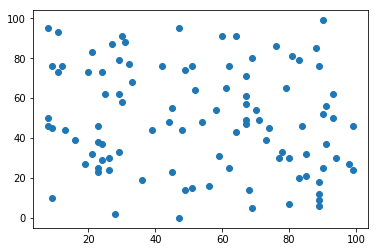

In [131]:
plt.scatter(X1, X2)

In [136]:
training_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [137]:
training_data

[[68, 14],
 [91, 56],
 [83, 79],
 [49, 14],
 [28, 2],
 [93, 62],
 [51, 76],
 [24, 29],
 [45, 55],
 [81, 81],
 [21, 83],
 [42, 76],
 [25, 62],
 [67, 61],
 [49, 74],
 [62, 76],
 [56, 16],
 [27, 87],
 [47, 95],
 [23, 38],
 [98, 27],
 [36, 19],
 [51, 15],
 [62, 25],
 [89, 76],
 [85, 32],
 [89, 9],
 [48, 44],
 [73, 39],
 [93, 50],
 [21, 32],
 [44, 48],
 [67, 49],
 [33, 68],
 [11, 93],
 [26, 30],
 [70, 54],
 [89, 6],
 [39, 44],
 [54, 48],
 [90, 99],
 [23, 46],
 [32, 77],
 [76, 86],
 [47, 0],
 [67, 57],
 [11, 73],
 [94, 30],
 [9, 10],
 [30, 91],
 [79, 65],
 [9, 76],
 [88, 85],
 [52, 64],
 [59, 31],
 [26, 24],
 [89, 18],
 [29, 62],
 [30, 58],
 [64, 43],
 [90, 25],
 [58, 54],
 [69, 80],
 [91, 37],
 [64, 91],
 [84, 46],
 [23, 23],
 [9, 45],
 [24, 37],
 [24, 73],
 [31, 88],
 [77, 30],
 [67, 47],
 [13, 44],
 [29, 79],
 [8, 46],
 [67, 71],
 [85, 21],
 [8, 95],
 [90, 52],
 [78, 33],
 [80, 30],
 [61, 65],
 [45, 23],
 [60, 91],
 [74, 45],
 [71, 49],
 [19, 27],
 [89, 12],
 [80, 7],
 [83, 20],
 [99, 46]

In [138]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [139]:
# 拟合数据
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [140]:
# 各类中心点坐标列表
cluster.cluster_centers_

array([[24.78947368, 78.15789474],
       [51.81818182, 14.90909091],
       [87.38095238, 28.28571429],
       [20.16666667, 34.55555556],
       [78.        , 78.42857143],
       [59.35294118, 54.88235294]])

In [141]:
# 各点的分类结果
cluster.labels_

array([1, 4, 4, 1, 1, 4, 5, 3, 5, 4, 0, 0, 0, 5, 5, 4, 1, 0, 0, 3, 2, 1,
       1, 1, 4, 2, 2, 5, 2, 2, 3, 5, 5, 0, 0, 3, 5, 2, 3, 5, 4, 3, 0, 4,
       1, 5, 0, 2, 3, 0, 4, 0, 4, 5, 1, 3, 2, 0, 0, 5, 2, 5, 4, 2, 4, 2,
       3, 3, 3, 0, 0, 2, 5, 3, 0, 3, 4, 2, 0, 2, 2, 2, 5, 1, 4, 5, 5, 3,
       2, 2, 2, 2, 3, 0, 1, 3, 3, 2, 3, 0])

In [142]:
from collections import defaultdict

In [143]:
centers = defaultdict(list)

In [144]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

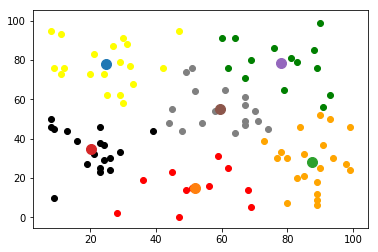

In [145]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Kmeans的计算复杂度

In [146]:
def distance(): return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

$$ O(I * N * k * d) $$

N: 10000  
k: 100  
d: 500  
I: 500  
-> 10**(5 + 2 + 2 + 2) => 10^11 => 100个亿